<a href="https://colab.research.google.com/github/manasdhir/pipelines-and-hyperparameter-tuning/blob/main/hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

#importing dataset

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
df1=load_wine()
print(df1)
df2=pd.DataFrame(df1.data,columns=df1.feature_names)
df2.head()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
df2["labels"]=df1.target
df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#splitting the dataset

In [ ]:
x=df2.iloc[:, :-1]
y=pd.DataFrame(df2["labels"],columns=["labels"])

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=1)

#SVC model

In [ ]:
from sklearn.svm import SVC
clf = SVC()

In [ ]:
para={'kernel':['linear','poly','rbf','sigmoid'],'C':[1, 5, 10, 20],"gamma":["scale", "auto"]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf1= GridSearchCV(clf, para, cv=5)

In [ ]:
clf1.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
result = pd.DataFrame(clf1.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.112947,0.025460,0.005437,0.001264,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.888889,0.944444,0.972222,1.000000,1.000000,0.961111,0.041574,1
1,0.004221,0.000270,0.003978,0.000169,1,scale,poly,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.638889,0.583333,0.638889,0.657143,0.742857,0.652222,0.051653,20
2,0.004413,0.000072,0.004149,0.000066,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.638889,0.611111,0.638889,0.685714,0.742857,0.663492,0.046362,19
3,0.006010,0.000432,0.004685,0.000825,1,scale,sigmoid,"{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.083333,0.111111,0.138889,0.228571,0.257143,0.163810,0.067498,29
4,0.085303,0.006594,0.005667,0.001301,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.888889,0.944444,0.972222,1.000000,1.000000,0.961111,0.041574,1
5,0.134228,0.041723,0.004381,0.000063,1,auto,poly,"{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}",0.972222,0.861111,0.972222,1.000000,1.000000,0.961111,0.051520,1
6,0.005862,0.000401,0.004745,0.000825,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.361111,0.416667,0.444444,0.428571,0.485714,0.427302,0.040501,24
7,0.004389,0.000039,0.003912,0.000068,1,auto,sigmoid,"{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.388889,0.388889,0.388889,0.400000,0.428571,0.399048,0.015376,25
8,0.180251,0.052644,0.005775,0.002127,5,scale,linear,"{'C': 5, 'gamma': 'scale', 'kernel': 'linear'}",0.888889,0.972222,0.944444,1.000000,1.000000,0.961111,0.041574,1
9,0.004864,0.001138,0.003974,0.000175,5,scale,poly,"{'C': 5, 'gamma': 'scale', 'kernel': 'poly'}",0.666667,0.611111,0.638889,0.685714,0.742857,0.669048,0.044716,18


In [ ]:
best_para= clf1.best_params_
best_para

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
highest_accuracy = clf1.best_score_
highest_accuracy

0.961111111111111

In [ ]:
clf=SVC(C=1,gamma="scale",kernel="linear")
clf.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [ ]:
pred_y=clf.predict(test_x)

In [ ]:
svcscore=clf.score(test_x,test_y)
svcscore

0.9629629629629629

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.95      0.95      0.95        19
           2       1.00      0.92      0.96        12

    accuracy                           0.96        54
   macro avg       0.97      0.95      0.96        54
weighted avg       0.96      0.96      0.96        54



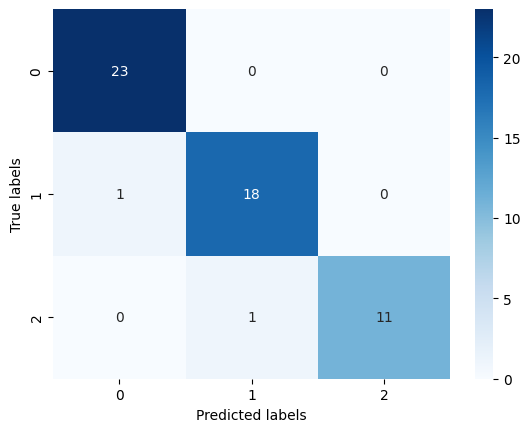

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(test_y, pred_y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#SGD classifier

Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance.

In [ ]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(random_state=1)

In [ ]:
para={"loss":["hinge","log_loss","modified_huber","squared_error"],"learning_rate":["constant","optimal","invscaling","adaptive"],"eta0":[0.1,0.3,0.5,0.75,1,2,3],
      "penalty":["l1","l2","elasticnet",None]}

In [ ]:
clf1 = GridSearchCV(clf,para,cv=5)
clf1.fit(x,y)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=1),
             param_grid={'eta0': [0.1, 0.3, 0.5, 0.75, 1, 2, 3],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log_loss', 'modified_huber',
                                  'squared_error'],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [ ]:
pd.DataFrame(clf1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,param_learning_rate,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011506,0.002702,0.005946,0.000274,0.1,constant,hinge,l1,"{'eta0': 0.1, 'learning_rate': 'constant', 'lo...",0.666667,0.583333,0.583333,0.628571,0.771429,0.646667,0.069735,178
1,0.008678,0.001799,0.005841,0.000185,0.1,constant,hinge,l2,"{'eta0': 0.1, 'learning_rate': 'constant', 'lo...",0.666667,0.611111,0.694444,0.600000,0.428571,0.600159,0.092602,277
2,0.008676,0.000469,0.005918,0.000371,0.1,constant,hinge,elasticnet,"{'eta0': 0.1, 'learning_rate': 'constant', 'lo...",0.666667,0.611111,0.583333,0.600000,0.657143,0.623651,0.032601,253
3,0.009028,0.002085,0.006398,0.001231,0.1,constant,hinge,None,"{'eta0': 0.1, 'learning_rate': 'constant', 'lo...",0.666667,0.583333,0.583333,0.628571,0.657143,0.623810,0.035347,244
4,0.010416,0.001235,0.006313,0.000418,0.1,constant,log_loss,l1,"{'eta0': 0.1, 'learning_rate': 'constant', 'lo...",0.666667,0.583333,0.638889,0.600000,0.742857,0.646349,0.056394,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.038792,0.008956,0.007731,0.002071,3,adaptive,modified_huber,None,"{'eta0': 3, 'learning_rate': 'adaptive', 'loss...",0.583333,0.611111,0.694444,0.742857,0.828571,0.692063,0.088989,42
444,0.018906,0.001949,0.006188,0.000266,3,adaptive,squared_error,l1,"{'eta0': 3, 'learning_rate': 'adaptive', 'loss...",0.222222,0.444444,0.333333,0.114286,0.428571,0.308571,0.125441,436
445,0.014253,0.000502,0.006553,0.000760,3,adaptive,squared_error,l2,"{'eta0': 3, 'learning_rate': 'adaptive', 'loss...",0.277778,0.416667,0.277778,0.142857,0.628571,0.348730,0.164547,375
446,0.018505,0.000792,0.006392,0.000401,3,adaptive,squared_error,elasticnet,"{'eta0': 3, 'learning_rate': 'adaptive', 'loss...",0.277778,0.361111,0.250000,0.171429,0.571429,0.326349,0.136719,402


In [ ]:
best_parameters = clf1.best_params_
print(best_parameters)

{'eta0': 2, 'learning_rate': 'adaptive', 'loss': 'log_loss', 'penalty': 'l2'}


In [ ]:
highest_accuracy = clf1.best_score_
print(highest_accuracy)

0.714920634920635


In [ ]:
clf=SGDClassifier(eta0=2, learning_rate='adaptive', loss='log_loss', penalty="l2")

In [ ]:
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sgdscore=clf.score(test_x,test_y)
sgdscore

0.7222222222222222

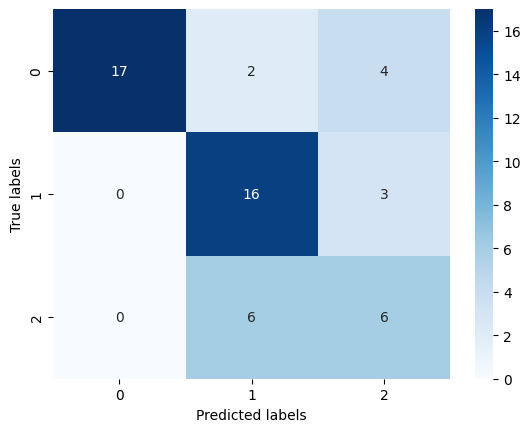

In [ ]:
cm = confusion_matrix(test_y, pred_y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        23
           1       0.67      0.84      0.74        19
           2       0.46      0.50      0.48        12

    accuracy                           0.72        54
   macro avg       0.71      0.69      0.69        54
weighted avg       0.76      0.72      0.73        54



#perceptron classifier

In [ ]:
from sklearn.linear_model import Perceptron
clf=Perceptron(random_state=1)

In [ ]:
para={"penalty":["l2","l1","elasticnet"]}

In [ ]:
clf1=GridSearchCV(clf,para,cv=10)
clf1.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=10, estimator=Perceptron(random_state=1),
             param_grid={'penalty': ['l2', 'l1', 'elasticnet']})

In [ ]:
pd.DataFrame(clf1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008830,0.001190,0.006278,0.000580,l2,{'penalty': 'l2'},0.666667,0.666667,0.500000,0.555556,0.500000,0.500000,0.611111,0.666667,0.470588,0.882353,0.601961,0.119107,2
1,0.009469,0.001001,0.006141,0.000493,l1,{'penalty': 'l1'},0.611111,0.611111,0.388889,0.388889,0.555556,0.722222,0.611111,0.666667,0.529412,0.470588,0.555556,0.106227,3
2,0.009423,0.000646,0.006763,0.001472,elasticnet,{'penalty': 'elasticnet'},0.500000,0.611111,0.500000,0.611111,0.611111,0.722222,0.555556,0.666667,0.588235,0.764706,0.613072,0.082028,1


In [ ]:
clf1.best_params_

{'penalty': 'elasticnet'}

In [ ]:
perceptronscore=clf1.best_score_
perceptronscore

0.6130718954248366

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy is  0.7222222222222222


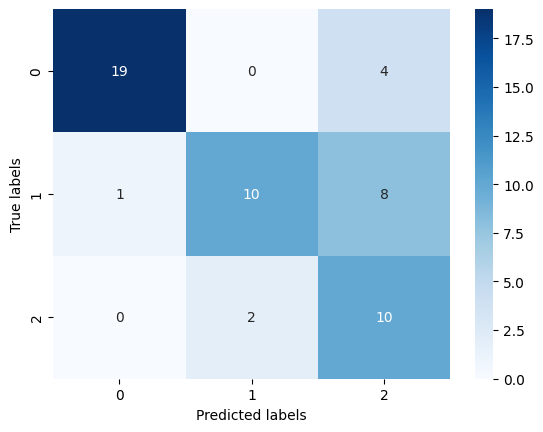

In [ ]:
clf=Perceptron(penalty="elasticnet")
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)
perceptronscore=clf.score(test_x,test_y)
print("accuracy is ", perceptronscore)
cm = confusion_matrix(test_y, pred_y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.83      0.53      0.65        19
           2       0.45      0.83      0.59        12

    accuracy                           0.72        54
   macro avg       0.75      0.73      0.71        54
weighted avg       0.80      0.72      0.73        54



#multi-layer perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier()

In [ ]:
para={"activation":["identity", "logistic", "tanh", "relu"],"solver":["lbfgs", "sgd", "adam"]}

In [ ]:
clf1 = GridSearchCV(clf,para,cv=10)
clf1.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packa

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [ ]:
pd.DataFrame(clf1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.229639,0.136593,0.008060,0.002336,identity,lbfgs,"{'activation': 'identity', 'solver': 'lbfgs'}",0.111111,0.944444,0.388889,0.944444,0.555556,0.888889,0.611111,1.000000,0.764706,1.000000,0.720915,0.284138,6
1,0.014523,0.002734,0.004443,0.000499,identity,sgd,"{'activation': 'identity', 'solver': 'sgd'}",0.388889,0.277778,0.277778,0.388889,0.388889,0.388889,0.388889,0.166667,0.235294,0.235294,0.313725,0.080474,12
2,0.076454,0.053545,0.004570,0.000244,identity,adam,"{'activation': 'identity', 'solver': 'adam'}",0.888889,0.944444,0.833333,0.611111,0.277778,0.388889,0.888889,0.611111,0.352941,0.352941,0.615033,0.246669,9
3,0.252704,0.016671,0.005115,0.000683,logistic,lbfgs,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.777778,1.000000,0.722222,0.722222,0.722222,0.777778,0.722222,0.888889,1.000000,0.882353,0.821569,0.107339,3
4,0.151228,0.018877,0.004854,0.000429,logistic,sgd,"{'activation': 'logistic', 'solver': 'sgd'}",0.611111,0.666667,0.666667,0.555556,0.555556,0.722222,0.611111,0.666667,0.764706,0.764706,0.658497,0.072461,7
5,0.173926,0.006939,0.005041,0.000301,logistic,adam,"{'activation': 'logistic', 'solver': 'adam'}",0.833333,0.944444,0.944444,0.833333,0.777778,0.944444,0.888889,0.944444,1.000000,1.000000,0.911111,0.071146,1
6,0.486170,0.198178,0.006456,0.001192,tanh,lbfgs,"{'activation': 'tanh', 'solver': 'lbfgs'}",0.888889,0.944444,0.722222,0.500000,0.722222,0.722222,1.000000,0.944444,1.000000,0.470588,0.791503,0.185895,4
7,0.092784,0.059792,0.004554,0.000464,tanh,sgd,"{'activation': 'tanh', 'solver': 'sgd'}",0.388889,0.722222,0.666667,0.611111,0.444444,0.333333,0.333333,0.666667,0.764706,0.764706,0.569608,0.167319,10
8,0.406888,0.163748,0.005034,0.000282,tanh,adam,"{'activation': 'tanh', 'solver': 'adam'}",0.833333,0.944444,0.944444,0.777778,0.777778,0.944444,0.888889,0.944444,1.000000,1.000000,0.905556,0.078764,2
9,0.160573,0.104987,0.004570,0.000396,relu,lbfgs,"{'activation': 'relu', 'solver': 'lbfgs'}",0.666667,0.666667,0.888889,0.944444,0.888889,1.000000,0.388889,1.000000,0.411765,1.000000,0.785621,0.225808,5


In [ ]:
clf1.best_params_

{'activation': 'logistic', 'solver': 'adam'}

In [ ]:
clf1.best_score_

0.9111111111111111

In [ ]:
clf=MLPClassifier(activation="logistic",solver="adam")
clf.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic')

In [ ]:
pred_y=clf.predict(test_x)
mlpscore=clf.score(test_x,test_y)
mlpscore

0.9259259259259259

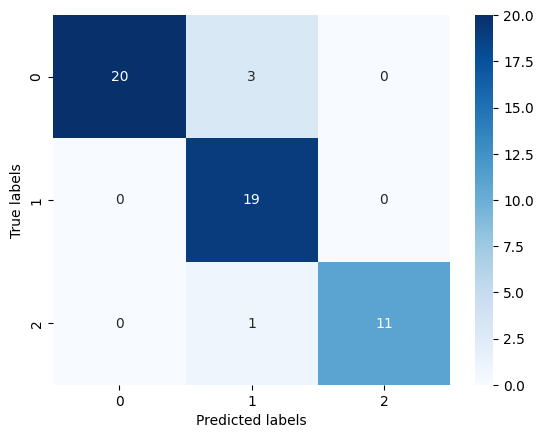

In [ ]:
cm = confusion_matrix(test_y, pred_y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        23
           1       0.83      1.00      0.90        19
           2       1.00      0.92      0.96        12

    accuracy                           0.93        54
   macro avg       0.94      0.93      0.93        54
weighted avg       0.94      0.93      0.93        54



#logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [ ]:
para={"penalty":["l1","l2","elasticnet",None],"class_weight":["balanced",None],"solver":["newton-cg","newton-cholesky","saga","lbfgs","liblinear", "sag"]}

In [ ]:
clf1 = GridSearchCV(clf,para,cv=10)
clf1.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passe

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'newton-cholesky', 'saga',
                                    'lbfgs', 'liblinear', 'sag']})

In [ ]:
pd.DataFrame(clf1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000756,0.000258,0.000000,0.000000,balanced,l1,newton-cg,"{'class_weight': 'balanced', 'penalty': 'l1', ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
1,0.000584,0.000035,0.000000,0.000000,balanced,l1,newton-cholesky,"{'class_weight': 'balanced', 'penalty': 'l1', ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
2,0.015119,0.001001,0.004487,0.000580,balanced,l1,saga,"{'class_weight': 'balanced', 'penalty': 'l1', ...",0.555556,0.666667,...,0.500000,0.555556,0.777778,0.666667,0.833333,0.823529,0.941176,0.709804,0.136489,19
3,0.001014,0.000507,0.000000,0.000000,balanced,l1,lbfgs,"{'class_weight': 'balanced', 'penalty': 'l1', ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
4,0.013035,0.001827,0.004420,0.000992,balanced,l1,liblinear,"{'class_weight': 'balanced', 'penalty': 'l1', ...",0.833333,0.944444,...,0.944444,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,0.955556,0.054433,7
5,0.000603,0.000039,0.000000,0.000000,balanced,l1,sag,"{'class_weight': 'balanced', 'penalty': 'l1', ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
6,0.174006,0.021158,0.006568,0.001781,balanced,l2,newton-cg,"{'class_weight': 'balanced', 'penalty': 'l2', ...",0.944444,0.944444,...,0.944444,0.944444,0.944444,1.000000,1.000000,1.000000,1.000000,0.961111,0.035573,6
7,0.020614,0.006690,0.005924,0.000293,balanced,l2,newton-cholesky,"{'class_weight': 'balanced', 'penalty': 'l2', ...",0.944444,1.000000,...,0.944444,0.944444,0.944444,1.000000,1.000000,1.000000,1.000000,0.972222,0.027778,3
8,0.019718,0.001350,0.006034,0.000467,balanced,l2,saga,"{'class_weight': 'balanced', 'penalty': 'l2', ...",0.500000,0.666667,...,0.500000,0.555556,0.777778,0.666667,0.833333,0.823529,0.941176,0.704248,0.143599,20
9,0.040506,0.003619,0.006571,0.000788,balanced,l2,lbfgs,"{'class_weight': 'balanced', 'penalty': 'l2', ...",0.833333,0.944444,...,0.944444,0.888889,0.944444,1.000000,1.000000,1.000000,1.000000,0.944444,0.055556,14


In [ ]:
clf1.best_params_

{'class_weight': 'balanced', 'penalty': None, 'solver': 'newton-cholesky'}

In [ ]:
clf1.best_score_

0.9777777777777779

In [ ]:
clf=LogisticRegression(class_weight="balanced",penalty=None,solver="newton-cholesky")
clf.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', penalty=None,
                   solver='newton-cholesky')

In [ ]:
pred_y=clf.predict(test_x)
logisticregscore=clf.score(test_x,test_y)
logisticregscore

0.9814814814814815

In [ ]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.92      0.96        12

    accuracy                           0.98        54
   macro avg       0.98      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



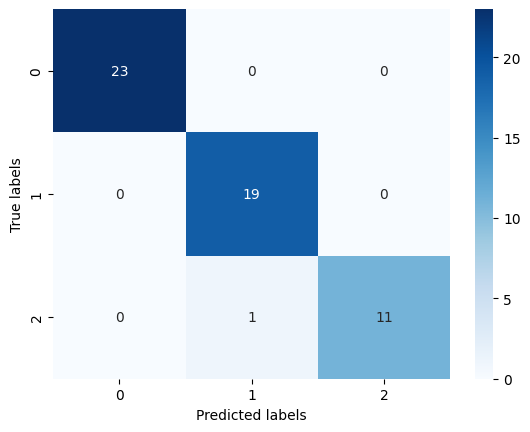

In [ ]:
cm = confusion_matrix(test_y, pred_y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#logistic regression with cross validation

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=5,Cs=[0.1,0.3,0.5,0.7,1,2,3],solver="liblinear")

In [ ]:
clf.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=[0.1, 0.3, 0.5, 0.7, 1, 2, 3], cv=5, solver='liblinear')

In [ ]:
pred_y=clf.predict(test_x)
logisticregCVscore=clf.score(test_x,test_y)
logisticregCVscore

0.9629629629629629

#CallibratedClassifierCV


In [ ]:
from sklearn.calibration import CalibratedClassifierCV
base = LogisticRegression()
calibrated_clf = CalibratedClassifierCV(base, method='sigmoid',cv=5)
calibrated_clf.fit(train_x,train_y)
prob_y=calibrated_clf.predict_proba(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

In [ ]:
pd.DataFrame(prob_y)

,0,1,2
0,0.100094,0.198380,0.701526
1,0.016301,0.947396,0.036303
2,0.691189,0.225566,0.083245
3,0.183430,0.767410,0.049160
4,0.849831,0.009515,0.140655
5,0.082390,0.204380,0.713230
6,0.134752,0.674570,0.190678
7,0.880591,0.001323,0.118086
8,0.048716,0.084740,0.866543
9,0.039995,0.845953,0.114052
